1. Defining the Question

a) Specifying the question


Which Individuals are likely to have a bank account in East Africa ?

b)Defining Metric of Success

The main objective in this analysis is to provide indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.
Also, avail insight of demographic factors that might drive individuals financial outcomes. 



 In order to meet the main objective the analysis will be able to give a solution to the following research questions:

 
What is the number of individuals in East Africa has a bank account per country?

c) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


d) Recording the Experimental Design

Predict individuals likely to use Bank Account in East Africa

Define research question

Import Libraries

Read the data

Checking the data

Extenal Data source validation

Tidying the datasets

Exploratory Analysis

Implementing the solution

Challenging the solution

Follow up questions

Recommendation

e) Data Relevance

Data will be extracted from various Finscope surveys ranging from 2016 to 2018.

Links which assist to retrieve the data are http://bit.ly/VariableDefinitions and http://bit.ly/FinancialDataset

Variable definition acts as a metadata during our analysis.

2. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

3. Read the data

In [ ]:
#load the datasets from the source
url='http://bit.ly/FinancialDataset'

df = pd.read_csv('http://bit.ly/FinancialDataset', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the dataset
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


4.Checking the data

In [ ]:
#Determine the number of Records in our dataset
df.shape

(23524, 13)

In [ ]:
#Previewing the top of our dataset
#
df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

5.External Data Source Validation

6.Tidying the datasets

In [ ]:
#Rename the column names

df2=df.rename(columns = {'country': 'COUNTRY','year':'YEAR','uniqueid': 'UNIQUE_ID' ,'Has a Bank account':'BANK_AC','Type of Location' : 'LOCATION', 'Cell Phone Access':'PHONE_ACCESS', 'household_size':'HOUSEHOLD_SIZE','Respondent Age':'RESPONDENT_AGE','gender_of_respondent':'RESPONDENT_GENDER','The relathip with head':'RELATIONSHIP','marital_status':'MARITAL_STATUS','Level of Educuation':'EDUCATION_LEVEL','Type of Job':'JOB_TYPE'},inplace = False)

#Preview the dataset columns
df2.columns

Index(['COUNTRY', 'YEAR', 'UNIQUE_ID', 'BANK_AC', 'LOCATION', 'PHONE_ACCESS',
       'HOUSEHOLD_SIZE', 'RESPONDENT_AGE', 'RESPONDENT_GENDER', 'RELATIONSHIP',
       'MARITAL_STATUS', 'EDUCATION_LEVEL', 'JOB_TYPE'],
      dtype='object')

In [ ]:
# Drop id column
df2.drop(columns='UNIQUE_ID', inplace=True)
#Preview
df2

,COUNTRY,YEAR,BANK_AC,LOCATION,PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,RESPONDENT_GENDER,RELATIONSHIP,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


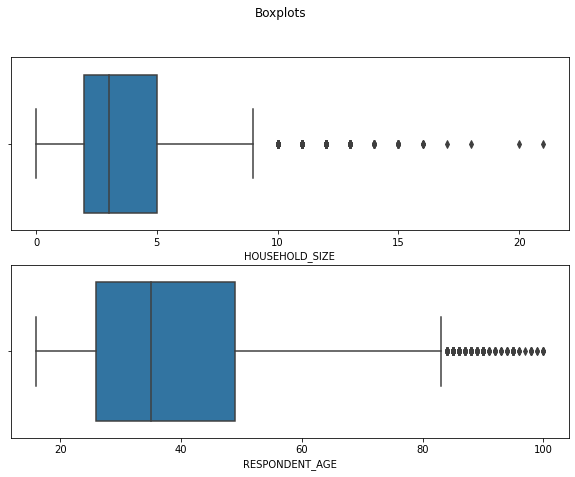

In [ ]:
#checking for outliers
fig, (ax1, ax2)= plt.subplots(2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df2['HOUSEHOLD_SIZE'], ax=ax1)
sns.boxplot(df2['RESPONDENT_AGE'], ax=ax2)
plt.show()

In [ ]:
#Checking for Anomalies
q1_HOUSEHOLD = df2['HOUSEHOLD_SIZE'].quantile(.25)
q3_HOUSEHOLD = df2['HOUSEHOLD_SIZE'].quantile(.75)

iqr_HOUSEHOLD = q3_HOUSEHOLD - q1_HOUSEHOLD


q1_RESPONDENT = df2['RESPONDENT_AGE'].quantile(.25)
q3_RESPONDENT = df2['RESPONDENT_AGE'].quantile(.75)

iqr_RESPONDENT = q3_RESPONDENT - q1_RESPONDENT

print(iqr_HOUSEHOLD, iqr_RESPONDENT)

3.0 23.0


In [ ]:
#check for duplicates
df2.duplicated().sum()


4373

In [ ]:
# Check for unique values in each column
for col in df2.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df2[col].unique(), end='\n')
  print('**********')
  print('\n')

COUNTRY column unique values: 

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
**********


YEAR column unique values: 

[2018 2029 2056 2016 2039 2017]
**********


BANK_AC column unique values: 

['Yes' 'No' nan]
**********


LOCATION column unique values: 

['Rural' 'Urban' nan]
**********


PHONE_ACCESS column unique values: 

['Yes' 'No' nan]
**********


HOUSEHOLD_SIZE column unique values: 

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
**********


RESPONDENT_AGE column unique values: 

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
**********


RESPONDE

Anomalies oserved are:

HOUSEHOLD_SIZE has a value 0.

EDUCATION_lEVEL column has a value 6 .

YEAR column has incorrect data i.e 2029, 2039 and 2056.

Missing values in multiple columns


In [ ]:
#Preview the rows with anomalies in Education column

df2[df2['EDUCATION_LEVEL']=='6']

,COUNTRY,YEAR,BANK_AC,LOCATION,PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,RESPONDENT_GENDER,RELATIONSHIP,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
6867,Rwanda,2016,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8226,Rwanda,2016,No,Rural,No,2.0,80.0,Male,Head of Household,Married/Living together,6,Informally employed
8453,Rwanda,2016,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9269,Rwanda,2016,Yes,Urban,Yes,2.0,70.0,Female,Head of Household,Widowed,6,Remittance Dependent
9878,Rwanda,2016,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private
9944,Rwanda,2016,Yes,Urban,Yes,3.0,38.0,Male,Head of Household,Married/Living together,6,Informally employed
10560,Rwanda,2016,No,Rural,Yes,6.0,48.0,Female,Spouse,Married/Living together,6,Informally employed
10767,Rwanda,2016,No,Rural,No,2.0,63.0,Female,Head of Household,Divorced/Seperated,6,Informally employed


In [ ]:
#Dealing with the anomalies in Education level column
err_education = df2[df2['EDUCATION_LEVEL']== '6'].index
df2.drop(index=err_education, inplace=True)

#preview
err_education

Int64Index([ 6867,  7937,  8226,  8453,  8778,  9269,  9878,  9944, 10560,
            10767, 10944, 12358, 13404, 13727, 14277, 14513, 14692, 14706,
            14892, 15379, 19695, 21988, 22046, 22101, 22224, 22643, 22760],
           dtype='int64')

In [ ]:
#preview the rows with anomalies in household size column
df2[df2['HOUSEHOLD_SIZE']==0]

,COUNTRY,YEAR,BANK_AC,LOCATION,PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,RESPONDENT_GENDER,RELATIONSHIP,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
15171,Tanzania,2017,No,Urban,Yes,0.0,30.0,Female,Head of Household,Married/Living together,Primary education,No Income
15897,Tanzania,2017,No,Urban,Yes,0.0,24.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
15918,Tanzania,2017,No,Rural,No,0.0,27.0,Male,Parent,Divorced/Seperated,Secondary education,No Income
16006,Tanzania,2017,No,Rural,Yes,0.0,22.0,Female,Head of Household,Divorced/Seperated,Tertiary education,Remittance Dependent
16132,Tanzania,2017,No,Rural,No,0.0,18.0,Female,Other relative,Divorced/Seperated,Secondary education,Remittance Dependent
16137,Tanzania,2017,No,Urban,Yes,0.0,23.0,Female,Head of Household,Divorced/Seperated,Primary education,No Income
16509,Tanzania,2017,No,Urban,Yes,0.0,23.0,Female,Parent,Divorced/Seperated,Tertiary education,No Income
16561,Tanzania,2017,No,Urban,No,0.0,87.0,Female,Head of Household,Widowed,No formal education,No Income
16702,Tanzania,2017,No,Urban,Yes,0.0,32.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
16987,Tanzania,2017,No,Urban,No,0.0,75.0,Female,Head of Household,Married/Living together,Primary education,No Income


In [ ]:
#preview incorret data in YEAR column
er_year = df2[df2['YEAR'].isin([2029,2056,2039])]
er_year

,COUNTRY,YEAR,BANK_AC,LOCATION,PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,RESPONDENT_GENDER,RELATIONSHIP,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
213,Kenya,2029,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [ ]:
# Drop incorrect data in YEAR column
er_year = df2[df2['YEAR'].isin([2029,2056,2039])].index
df2.drop(index=er_year, inplace=True)

#preview
er_year 

Int64Index([213, 308, 7014], dtype='int64')

In [ ]:
#Identifying the Missing Data
df2.isnull().sum()

COUNTRY              14
YEAR                  0
BANK_AC              36
LOCATION             15
PHONE_ACCESS         11
HOUSEHOLD_SIZE       28
RESPONDENT_AGE       34
RESPONDENT_GENDER    34
RELATIONSHIP          4
MARITAL_STATUS       32
EDUCATION_LEVEL      29
JOB_TYPE             30
dtype: int64

In [ ]:
# Dealing with the Missing Data
df2.dropna(axis=0,inplace=True)

#Preview the number of records in the dataset
df2[df2.columns[0]].count()

23313

In [ ]:
# More data cleaning procedures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#check for unique values
df2.nunique()

COUNTRY               4
YEAR                  3
BANK_AC               2
LOCATION              2
PHONE_ACCESS          2
HOUSEHOLD_SIZE       21
RESPONDENT_AGE       85
RESPONDENT_GENDER     2
RELATIONSHIP          6
MARITAL_STATUS        5
EDUCATION_LEVEL       6
JOB_TYPE             10
dtype: int64

7. Exploratory Analysis

a. Univariate analysis

In [ ]:
#What are proportion of individual with or without bank account
df2['BANK_AC'].value_counts(normalize=True)*100

No     85.883413
Yes    14.116587
Name: BANK_AC, dtype: float64

In [ ]:
#Frequency Distribution for categorical variables
cat_df = df2.select_dtypes(include='object').columns.to_list()
for col in cat_df:
  print(f'Column: {col}')
  print(df2[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: COUNTRY
Rwanda      8665
Tanzania    6497
Kenya       6062
Uganda      2089
Name: COUNTRY, dtype: int64
**********


Column: BANK_AC
No     20022
Yes     3291
Name: BANK_AC, dtype: int64
**********


Column: LOCATION
Rural    14247
Urban     9066
Name: LOCATION, dtype: int64
**********


Column: PHONE_ACCESS
Yes    17315
No      5998
Name: PHONE_ACCESS, dtype: int64
**********


Column: RESPONDENT_GENDER
Female    13748
Male       9565
Name: RESPONDENT_GENDER, dtype: int64
**********


Column: RELATIONSHIP
Head of Household      12714
Spouse                  6459
Child                   2221
Parent                  1069
Other relative           661
Other non-relatives      189
Name: RELATIONSHIP, dtype: int64
**********


Column: MARITAL_STATUS
Married/Living together    10682
Single/Never Married        7899
Widowed                     2677
Divorced/Seperated          2047
Dont know                      8
Name: MARITAL_STATUS, dtype: int64
**********


Column: EDUCATION_LEVEL


Text(0.5, 1.0, 'RESPONDENT WITH BANK ACCOUNT VS NO BANK ACCOUNT')

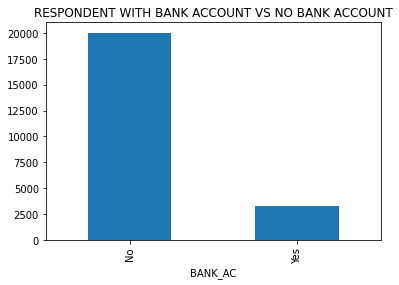

In [ ]:
#How many people has a bank account in East Africa?

#initially, set that counter to 1.
df2['COUNTER'] =1
group_data = df2.groupby(['BANK_AC',])['COUNTER'].sum().plot.bar()
plt.title('RESPONDENT WITH BANK ACCOUNT VS NO BANK ACCOUNT')



From the bar plot diagram We can see that only few people in East Africa has a bank account.

In [ ]:
# Describe numerical variables
df2[['HOUSEHOLD_SIZE','RESPONDENT_AGE']].describe()

,HOUSEHOLD_SIZE,RESPONDENT_AGE
count,23313.000000,23313.000000
mean,3.688414,38.793549
std,2.280842,16.510611
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


Text(0.5, 1.0, 'RESPONDENT AGE DISTRIBUTION')

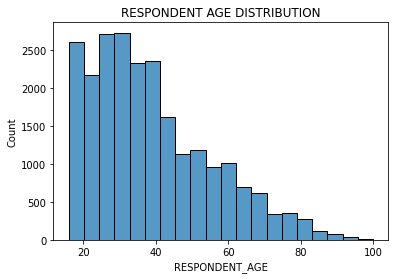

In [ ]:
sns.histplot(df2['RESPONDENT_AGE'], bins=20)

plt.title('RESPONDENT AGE DISTRIBUTION')

In [ ]:
#check for skewness in age column
df2['RESPONDENT_AGE'].skew()

0.8412764239448531

The age variable is positively skewed

In [ ]:
#check for kurtosis in column for age
df2['RESPONDENT_AGE'].kurt()

0.10122691422605756

Text(0.5, 1.0, 'RESPONDENT HOUSEHOLD_SIZE DISTRIBUTION')

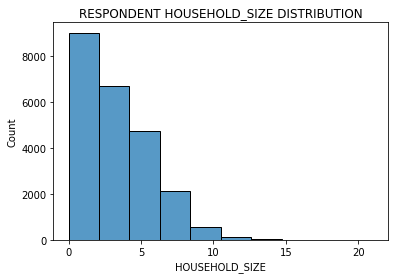

In [ ]:
sns.histplot(df2['HOUSEHOLD_SIZE'], bins=10)

plt.title('RESPONDENT HOUSEHOLD_SIZE DISTRIBUTION')

In [ ]:
#check for skewness in column for Household
df2['HOUSEHOLD_SIZE'].skew()

0.9737983207814955

Household variable is positively skewed

In [ ]:
#check for kurtosis in column for Household
df2['HOUSEHOLD_SIZE'].kurt()

1.1530073057375057

The distribution is platykurtic thus no outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


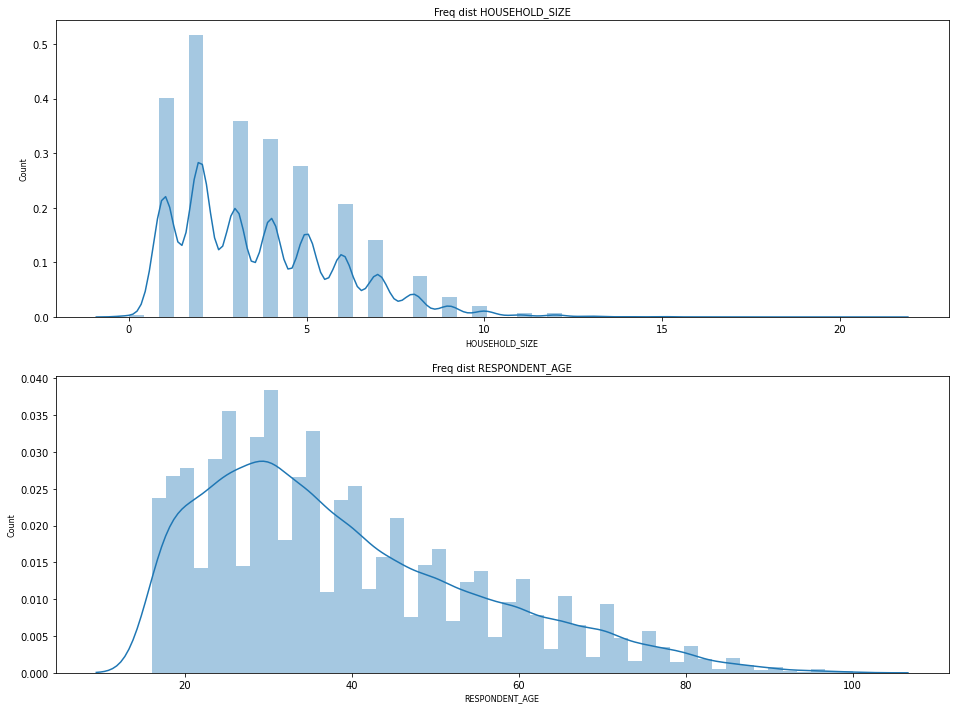

In [ ]:
#univariate distribution of the numerical columns 
col_names = ['HOUSEHOLD_SIZE','RESPONDENT_AGE']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):

    sns.distplot(df2[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

We can see that both HOUSEHOLD_SIZE and RESPONDENT_AGE  column are skewed to the right which indicates most of the values lie in the upper range.

b.Bivariate Analysis

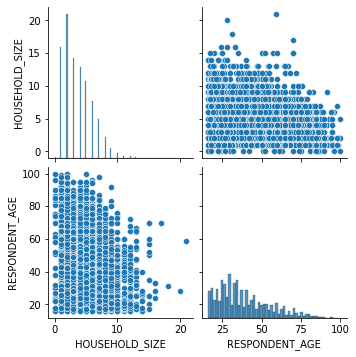

In [ ]:
# Determine correlation between Household size and Respondent age
sns.pairplot(df2[['HOUSEHOLD_SIZE', 'RESPONDENT_AGE']])

In [ ]:
#what is correlation between Respondent age and Householdsize
df2['RESPONDENT_AGE'].corr(df2['HOUSEHOLD_SIZE'])

-0.11918485538538871


From the scatter plot and pearsons correlation, there is very weak negative correlation between RESPONDENT_AGE and HOUSEHOLD_SIZE

Hypothesis Testing

In [ ]:
# Relationship between Bank Account and Year
table_phone=pd.crosstab(df2.BANK_AC, df2.PHONE_ACCESS, margins=True, margins_name="Total")
table_phone

PHONE_ACCESS,No,Yes,Total
BANK_AC,,,
No,5894,14128,20022
Yes,104,3187,3291
Total,5998,17315,23313



To test relationship between phone access and if the respondent has a bank account or not.

Null Hypothesis : Cell phone access has no influence on if an individual has a bank account or not

Alternative Hypothesis : Cell phone access has influence on if an individual has a bank account or not

In [ ]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_phone.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 9.487729036781154, Test statistic: 1021.3442231382986
Alpha: 0.050000000000000044, p-value: 8.451068662779223e-220



p-value less than alpha, thus significant evidence to reject null hypothesis

In [ ]:
#Relationship between country and Bank Account
table_country=pd.crosstab(df2.BANK_AC, df2.COUNTRY, margins=True, margins_name="Total")
table_country

COUNTRY,Kenya,Rwanda,Tanzania,Uganda,Total
BANK_AC,,,,,
No,4543,7672,5899,1908,20022
Yes,1519,993,598,181,3291
Total,6062,8665,6497,2089,23313


To test relationship between Country and if the respondent has a bank account or not.

Null Hypothesis : Country has no influence on if an individual has a bank account or not

Alternative Hypothesis : Country  has influence on if an individual has a bank account or not

In [ ]:
# Perform chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
 
stat, p, dof, expected = chi2_contingency(table_country.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 15.50731305586545, Test statistic: 829.5325755600998
Alpha: 0.050000000000000044, p-value: 8.865312561130096e-174


p-value less than alpha, thus significant evidence to reject null hypothesis

In [ ]:
#Relationship between Bank Account and Location
table_location=pd.crosstab(df2.BANK_AC, df2.LOCATION, margins=True, margins_name="Total")
table_location

LOCATION,Rural,Urban,Total
BANK_AC,,,
No,12586,7436,20022
Yes,1661,1630,3291
Total,14247,9066,23313


To test relationship between type of location and if the respondent has a bank account or not.

Null Hypothesis : Type of location does not influence if an individual has a bank account or not

Alternative Hypothesis : Type of location influences if an individual has a bank account or not

In [ ]:
stat, p, dof, expected = chi2_contingency(table_location.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 9.487729036781154, Test statistic: 182.56939446812947
Alpha: 0.050000000000000044, p-value: 2.0926153215025055e-38


p-value less than alpha, thus significant evidence to reject null hypothesis

In [ ]:
#What is the Relationship between Gender and if individual has a Bank Account
table_gender = pd.crosstab(df2['BANK_AC'], df2['RESPONDENT_GENDER'])
table_gender

RESPONDENT_GENDER,Female,Male
BANK_AC,,
No,12271,7751
Yes,1477,1814



To test relationship between gender and if the individual has a bank account or not.

Null Hypothesis : Gender has no influence if an individual has a bank account or not

Alternative Hypothesis : Gender has influences if an individual has a bank account or not

In [ ]:
stat, p, dof, expected = chi2_contingency(table_gender.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 3.841458820694124, Test statistic: 313.80694734870315
Alpha: 0.050000000000000044, p-value: 3.2353619819376854e-70


P value is less than Alpha thus the significant evidence to reject null hypothesis

In [ ]:
#identify field with invalid response
index_marital_status = df2[df2['MARITAL_STATUS'] == 'Dont know'].index.to_list()
index_education = df2[df2['EDUCATION_LEVEL'] == 'Other/Dont know/RTA'].index.to_list()
index_job = df2[df2['JOB_TYPE'] == 'Dont Know/Refuse to answer'].index.to_list()

to_drop = set(index_education + index_marital_status + index_job)

# Drop rows with identified indices
df2.drop(index=to_drop, inplace=True)

In [ ]:
#Relationship between Bank Account and JOB type
table_job=pd.crosstab(df2.BANK_AC, df2.JOB_TYPE, values=df2.RESPONDENT_AGE, aggfunc='mean').round(0)
table_job

JOB_TYPE,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
BANK_AC,,,,,,,,,
No,43.0,35.0,33.0,66.0,36.0,33.0,37.0,36.0,39.0
Yes,46.0,39.0,35.0,69.0,37.0,26.0,42.0,37.0,38.0


In [ ]:
stat, p, dof, expected = chi2_contingency(table_job.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 15.50731305586545, Test statistic: 1.4640762194602894
Alpha: 0.050000000000000044, p-value: 0.993288451885513


p-value higher  than alpha, thus significant evidence to accept null hypothesis

In [ ]:
#what is the relationship between education level and bank account
table_education = pd.crosstab(df2['BANK_AC'], df2['EDUCATION_LEVEL'])
table_education

EDUCATION_LEVEL,No formal education,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
BANK_AC,,,,,
No,4273,11529,3202,554,345
Yes,176,1078,973,587,455


To test relationship between level of education and if the respondent has a bank account or not.

Null Hypothesis : Level of education does not influence if an individual has a bank account or not

Alternative Hypothesis : Level of education influences if an individual has a bank account or not

In [ ]:
stat, p, dof, expected = chi2_contingency(table_education.to_numpy())
 
#Calculate critical value, set significance level = 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)
 
print(f'Propability: {prob}, Critical value: {critical_value}, Test statistic: {stat}')
print(f'Alpha: {1-prob}, p-value: {p}')

Propability: 0.95, Critical value: 9.487729036781154, Test statistic: 3511.46942026072
Alpha: 0.050000000000000044, p-value: 0.0


P value is less than Alpha value and the test statistics exceed the critical value thus rejecting the null hypothesis

In [ ]:
#sample 40 records in df2
df_sample = df2[['RESPONDENT_AGE', 'BANK_AC']].sample(n=40, random_state=1)

#preview the sample
df_sample

,RESPONDENT_AGE,BANK_AC
7209,31.0,No
5337,66.0,No
19480,16.0,No
16005,60.0,No
19746,55.0,No
16366,24.0,No
17378,41.0,No
10669,44.0,No
22261,54.0,No
11424,20.0,No



Investigate relationship between Respondent age and if the respondent has a bank account or not.

H0: Respondent age does not influence if a respondent has a bank account or not

H1: Respondent age influences if a respondent has a bank account or not

In [ ]:
# Perform a two sample z test
from statsmodels.stats.weightstats import ztest
zscore, p = ztest(x1 = df_sample[df_sample['BANK_AC']=='Yes']['RESPONDENT_AGE'].values, x2=df_sample[df_sample['BANK_AC']=='No']['RESPONDENT_AGE'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: -0.39059067028029193, p-value: 0.696099822947927


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


P-value is greater than significance level of 0.05, hence we accept the null hypothesis.

In [ ]:
#sample 40 records in df2
df_sample_2 = df2[['HOUSEHOLD_SIZE', 'BANK_AC']].sample(n=40, random_state=1)

#preview the sample
df_sample_2

,HOUSEHOLD_SIZE,BANK_AC
7209,4.0,No
5337,1.0,No
19480,2.0,No
16005,1.0,No
19746,4.0,No
16366,1.0,No
17378,2.0,No
10669,10.0,No
22261,1.0,No
11424,5.0,No


Investigate relationship between household size and if the respondent has a bank account or not.

H0: Household size does not influence if a respondent has a bank account or not

H1: Household size influences if a respondent has a bank account or not

In [ ]:
df_sample_2 = df2[['HOUSEHOLD_SIZE', 'BANK_AC']].sample(n=50, random_state=1)
zscore, p = ztest(x1 = df_sample_2[df_sample_2['BANK_AC']=='Yes']['HOUSEHOLD_SIZE'].values, x2=df_sample_2[df_sample_2['BANK_AC']=='No']['HOUSEHOLD_SIZE'].values)
print(f'Test statistic: {zscore}, p-value: {p}')

Test statistic: -2.1169345556762202, p-value: 0.03426540243096731


P-value is less than significance level of 0.05 hence we reject the null hypothesis.

In [ ]:
#Relationship between bank account and Respondent gender 
df2.groupby('BANK_AC')['RESPONDENT_GENDER'].value_counts().bar


BANK_AC  RESPONDENT_GENDER
No       Female               12196
         Male                  7707
Yes      Male                  1801
         Female                1468
Name: RESPONDENT_GENDER, dtype: int64

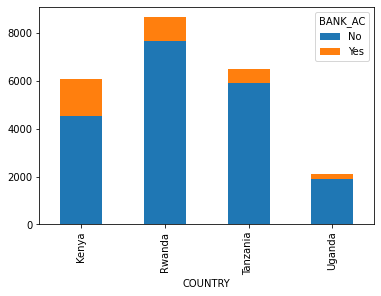

In [ ]:
# What is the relationship between individuals with Bank Account and country?
df2.groupby(['COUNTRY', 'BANK_AC']).size().unstack().plot(kind='bar', stacked=True)

From stacked bar chat we see that Kenya has most people with  Bank Account followed by Rwanda.

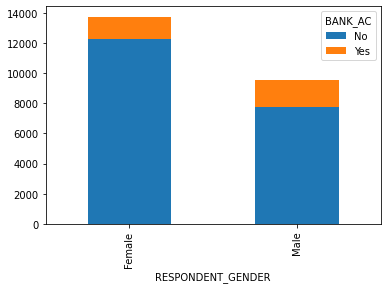

In [ ]:
#Compare between Respondent gender who has a bank account
df2.groupby(['RESPONDENT_GENDER',  'BANK_AC']).size().unstack().plot(kind='bar', stacked=True)

Male Gender has the largest percentage of individuals with bank account.

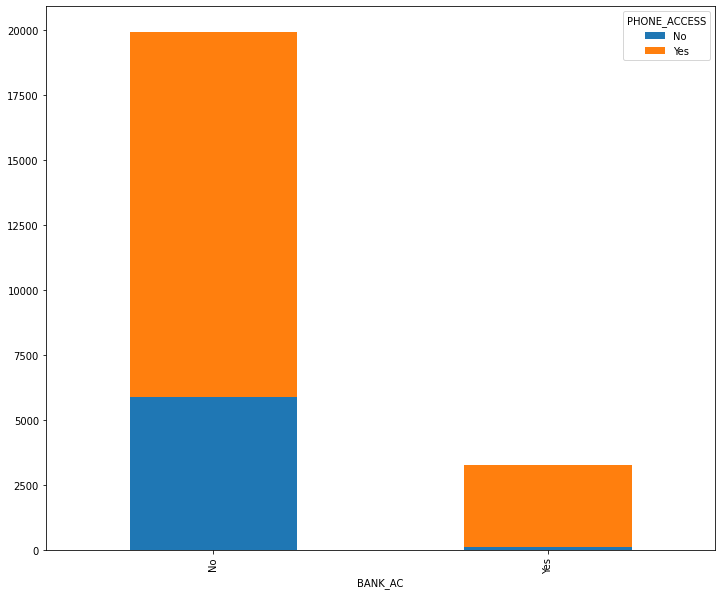

In [ ]:
#Relationship between individuals who have a bank account and phone acess
pd.crosstab(df2['BANK_AC'], df2['PHONE_ACCESS']).plot(kind='bar', stacked=True, figsize=(12,10))

A large percentage of individuals with Bank Account has a phone access

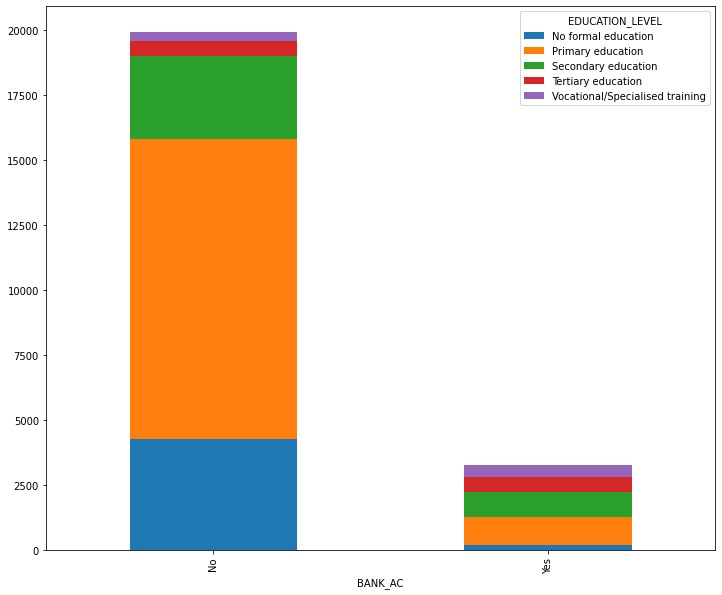

In [ ]:
#comparison between individuals who either have or donot have a bank account and their level of education
pd.crosstab(df2['BANK_AC'], df2['EDUCATION_LEVEL']).plot(kind='bar', stacked=True, figsize=(12,10))

we can see that the biggest percentage of individuals in East Africa has no bank account especially those who have a primary level of education and informal education.

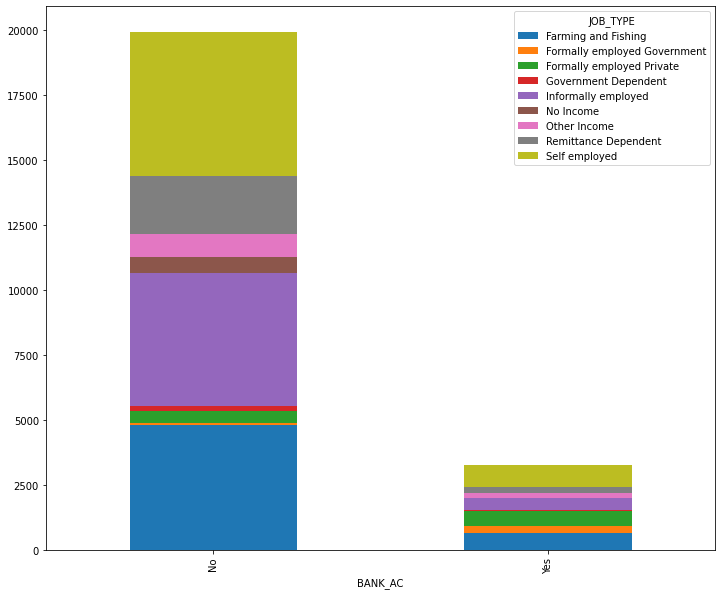

In [ ]:
# How has job type impacted on financial inclusion?
pd.crosstab(df2['BANK_AC'], df2['JOB_TYPE']).plot(kind='bar',stacked=True, figsize=(12,10))

Majority of the people who are self employed have a bank account

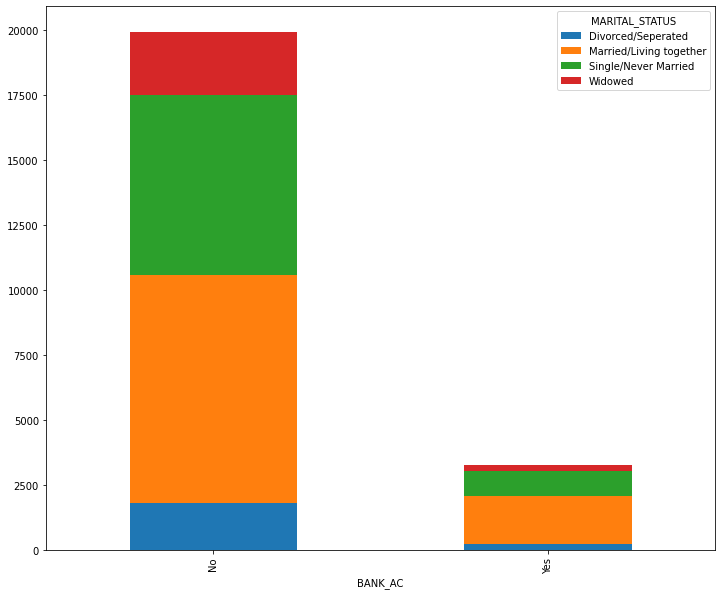

In [ ]:
#How has marital status affected marital status
pd.crosstab(df2['BANK_AC'], df2['MARITAL_STATUS']).plot(kind='bar', stacked=True, figsize=(12,10))

People or are leaving together or married a large percentage have a bank account

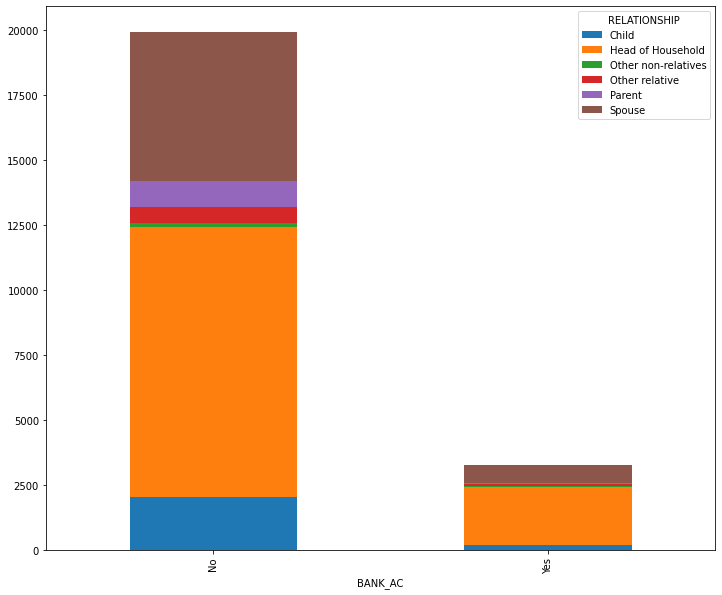

In [ ]:
#Compare individuals with bank account and their Relationship with head of familiy
pd.crosstab(df2['BANK_AC'], df2['RELATIONSHIP']).plot(kind='bar', stacked=True, figsize=(12,10))

Majority of the head of families has a bank account.

c.Multivariate Analysis

Text(0.5, 1.0, 'RESPONDENTS WITH BANK ACCOUNT')

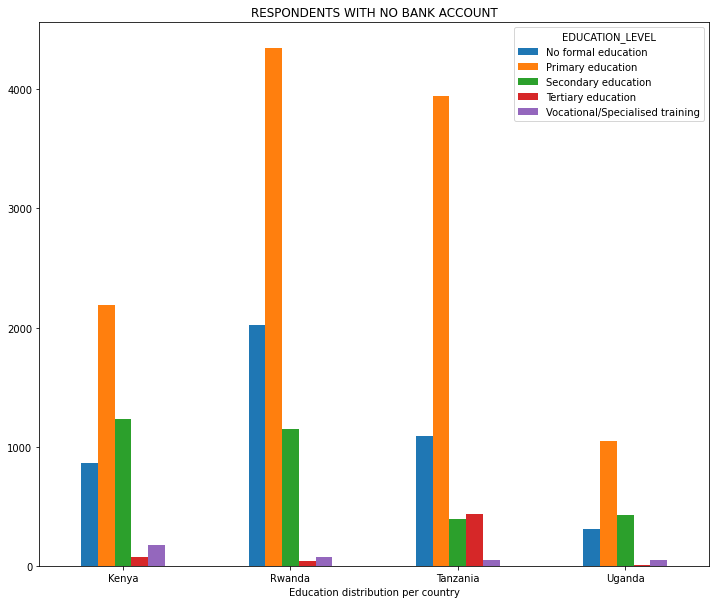

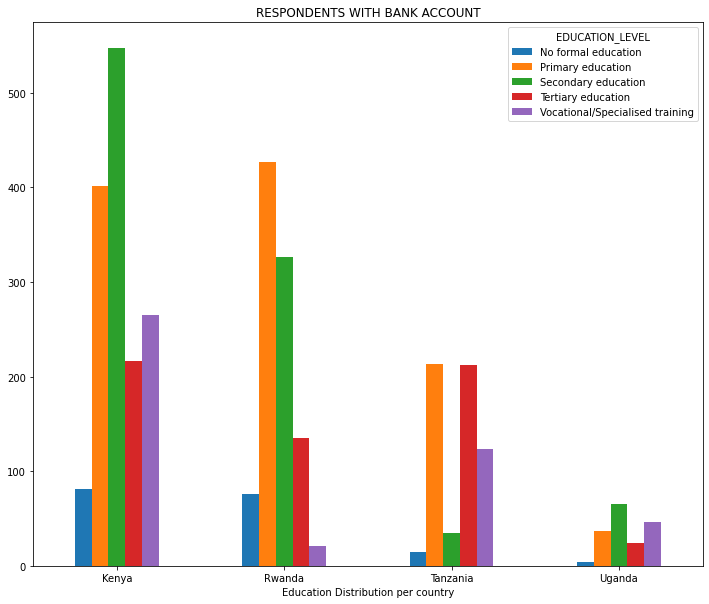

In [ ]:
#Investigate the Relationship between country and Level of education and Bank Account

country_bank = pd.crosstab(index=[df2['BANK_AC'], df2['COUNTRY']], columns=df2['EDUCATION_LEVEL'])

country_status.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education distribution per country')
plt.title('RESPONDENTS WITH NO BANK ACCOUNT')

country_bank.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1,2,3], labels=['Kenya','Rwanda','Tanzania','Uganda'], rotation=0)
plt.xlabel('Education Distribution per country')
plt.title('RESPONDENTS WITH BANK ACCOUNT')

The level of education that has highest number of individuals with a bank account per country are:

Kenya : Secondary Education

Rwanda : Primary education

Tanzania : Primary/Tertiary Education

Uganda : Secondary education

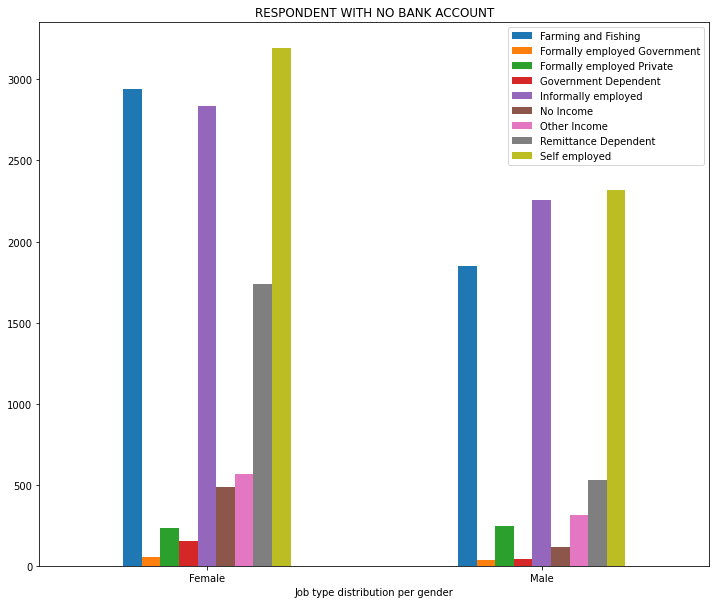

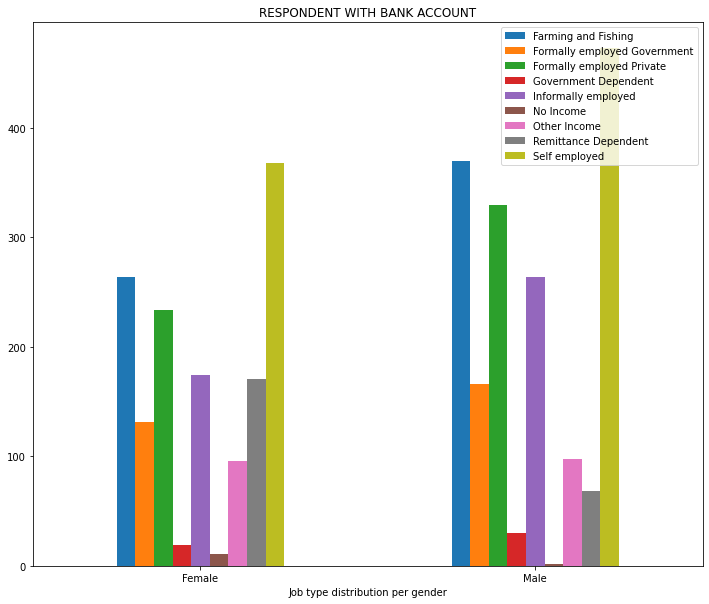

In [ ]:
#investigate the relationship between bank account, gender and job type
gender_job = pd.crosstab(index=[df2['BANK_AC'],df2['RESPONDENT_GENDER']], columns=df2['JOB_TYPE'])

gender_job.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('RESPONDENT WITH NO BANK ACCOUNT')
plt.legend(loc='upper right')

gender_job.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Female', 'Male'], rotation=0)
plt.xlabel('Job type distribution per gender')
plt.title('RESPONDENT WITH BANK ACCOUNT')
plt.legend(loc='upper right')

For both gender the following job types have the highest proportion of bank account:

Self employed

Farming and fishing

Formally employed private

Informally employed

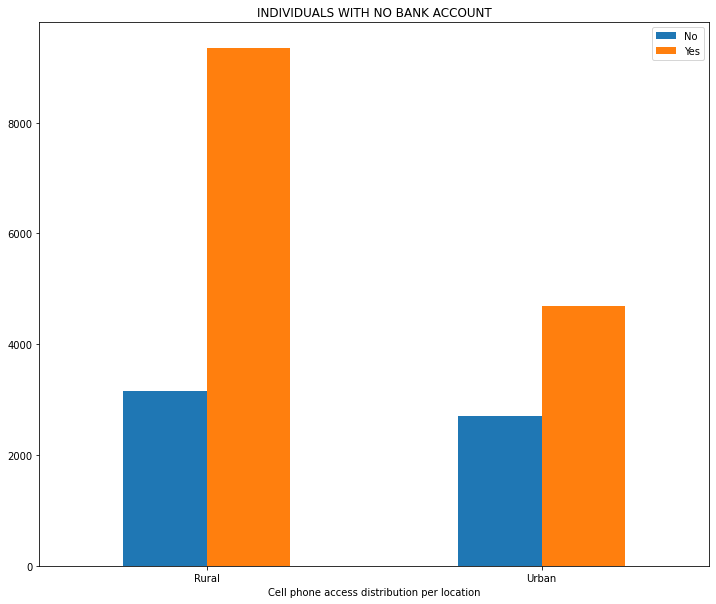

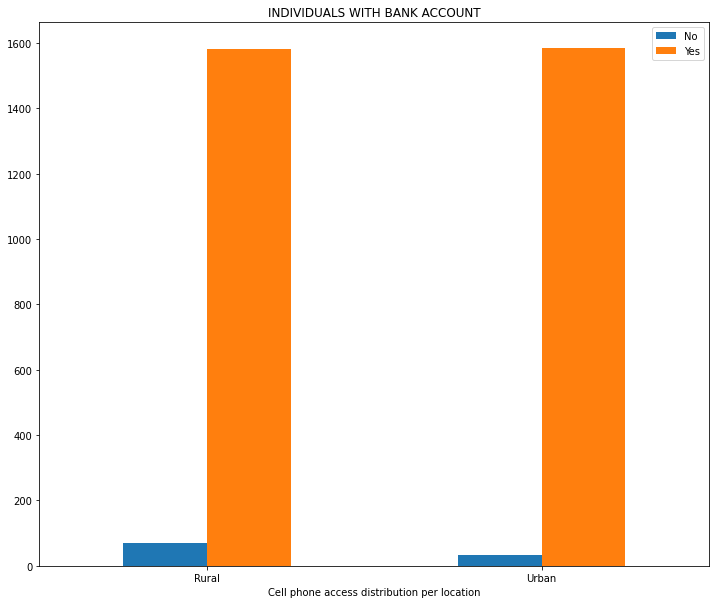

In [ ]:
# Investigate relationship between individuals who has phone access, location and bank account status
loc_phone = pd.crosstab(index=[df2['BANK_AC'],df2['LOCATION']], columns=df2['PHONE_ACCESS'])

loc_phone.loc[('No', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('INDIVIDUALS WITH NO BANK ACCOUNT')
plt.legend(loc='upper right')

loc_phone.loc[('Yes', slice(None)),:].plot(kind='bar', figsize=(12,10))
plt.xticks([0,1], labels=['Rural','Urban'], rotation=0)
plt.xlabel('Cell phone access distribution per location')
plt.title('INDIVIDUALS WITH BANK ACCOUNT')
plt.legend(loc='upper right')

A large proportion of population has bank account and phone access regardless of the location.

Linear Discriminant Analysis

In [ ]:
df2.columns

Index(['COUNTRY', 'YEAR', 'BANK_AC', 'LOCATION', 'PHONE_ACCESS',
       'HOUSEHOLD_SIZE', 'RESPONDENT_AGE', 'RESPONDENT_GENDER', 'RELATIONSHIP',
       'MARITAL_STATUS', 'EDUCATION_LEVEL', 'JOB_TYPE', 'COUNTER'],
      dtype='object')

In [ ]:

# Encode categorical features
factor_df = df2.drop('BANK_AC', axis=1)

#Convert year variable to object
factor_df['year'] = factor_df['YEAR'].astype('object')

# Get categorical codes for categorical columns
categorical_columns = ['COUNTRY', 'YEAR', 'LOCATION', 'PHONE_ACCESS', 'RESPONDENT_GENDER', 'RELATIONSHIP', 'MARITAL_STATUS', 'EDUCATION_LEVEL','JOB_TYPE']

for col in categorical_columns:
  factor_df[col] =factor_df[col].astype('category').cat.codes

In [ ]:
#preview the first five records
factor_df.head()

,COUNTRY,YEAR,LOCATION,PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,RESPONDENT_GENDER,RELATIONSHIP,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE,COUNTER,year
0,0,2,0,1,3.0,24.0,0,5,1,2,8,1,2018
1,0,2,0,0,5.0,70.0,0,1,3,0,3,1,2018
2,0,2,1,1,5.0,26.0,1,3,2,4,8,1,2018
3,0,2,0,1,5.0,34.0,0,1,1,1,2,1,2018
4,0,2,1,0,8.0,26.0,1,0,2,1,4,1,2018


In [ ]:

from sklearn.preprocessing import LabelBinarizer
Y = df2['BANK_AC']
print(Y.head())
Y = LabelBinarizer().fit_transform(Y)
print(Y[:5])

0    Yes
1     No
2    Yes
3     No
4     No
Name: BANK_AC, dtype: object
[[1]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
# The following code divides data into test and train sets, set test set to 30% of total data
x_train, x_test, y_train, y_test = train_test_split(factor_df, Y, test_size=3, random_state=42, stratify=Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Perform linear discrimant analysis to separate two classes
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)

# Determine explained variance ratio
lda.explained_variance_ratio_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


array([1.])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
# Test accuracy of lda classifier
lda_predict = lda.predict(x_test)
print(classification_report(y_test,lda_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3




The LDA classifier has a 88% accuracy.However, its relatively poor due to imbalance in the target variable.

8. Implementing the solution

Based on the Analysis a large proportion in East Africa has no bank account.
Men and head of families seems to contribute much in financial inclusion.
Also, its seen that factors such as level of education, employment status and country play a vital role in financial inclusion.

9. Challenging the solution

Based on the Analysis more effort should be put towards empowering women who occupies a large proportion in East Africa so as to elevate financial inclusion. 

9. Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?